In [0]:
from pandas_datareader import data as dr
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
start_date = '2014-01-01'
end_date = '2019-01-05'

Tickers Collected from Excel Spreadsheet on Yahoo Finance

In [0]:
original_health = [
'CRL','GH','MOH','HRC','PRGO','QGEN','CTLT','JAZZ','NVCR','TECH','BHC','TEVA','MASI','BGNE','ICLR','CGC','ABMD','IONS','NBIX'
,'HSIC','DVA','ALNY','PKI','GLPG','PODD','BIO','ELAN','MYL','WST','VAR','XRAY','SGEN','STE','BMRN','UHS','WCG','HOLX','GMAB'
,'CAH','DXCM','DGX','ALGN','WAT','COO','TFX','INCY','LH','MTD','ABC','GRFS','CNC','RMD','FMS','SNN','ALXN','IDXX','A','MCK'
,'ALC','ZBH','IQV','REGN','HUM','HCA','ILMN','BIIB','PHG','BAX','VRTX','EW','AGN','TAK','BSX','CI','ZTS','ISRG','ANTM','BDX'
,'CELG','SYK','BMY','GILD','CVS','DHR','GSK','DHR-PA','ABBV','LLY','TMO','SNY','AZN','AMGN','NVO','ABT','MDT','NVS','PFE','UNH'
,'MRK','JNJ','BKD','ENTA','IRWD','APHA','ATRI','EIDX','MGLN','NRC','INSP','APLS','PCRX','AKCA','TCDA','QURE','PDCO','USPH','INSM'
,'DNLI','CSII','PBH','MMSI','AVNS','DCPH','LVGO','MD','NVTA','PTLA','CBM','IRTC','AGIO','ICPT','PTCT','SEM','MYGN','HALO','BHVN'
,'THC','ARNA','NTRA','RARE','ITGR','ENSG','MYOK','GKOS','AMN','WMGI','TLRY','QDEL','GHDX','HCM','EBS','ARWR','NVRO','CNMD','ACHC'
,'BBIO','TARO','MEDP','ALKS','GBT','CMD','ICUI','FGEN','NKTR','NEOG','MRTX','NUVA','ALLO','UTHR','MOR','LHCG','LIVN','MDCO','BPMC'
,'ONCE','ALLK','RGEN','AMED','NVST','CBPO','ADPT','ARGX','PEN','GMED','ASND','HZNP','IART','ACAD','EXEL','SYNH','SRPT','BLUE','MRNA'
,'SDC','EHC','HAE','RDY','PRAH','BRKR','CHE','OMI','HARP','OBSV','CRNX','COLL','CTMX','SGRY','BLU','CBAY','UTMD','CYCN','BCEL','TCRR'
,'DPLO','CCXI','RCUS','DERM','XBIT','AMAG','VIVO','ITCI','CUTR','KNSA','PGNX','MIST','SYRS','OSUR','PBYI','REPL','MYOV','DTIL','SLDB'
,'TBIO','AVRO','LCI','THOR','AKRO','SNDL','VYGR','AUTL','IGMS','KPTI','SRDX','MGNX','MGTX','DBVT','MESO','GNFT','ANGO','RUBY','ANIK'
,'KURA','CRTX','PRNB','PRSC','PETQ','CYTK','HNGR','ATRA','ARVN','FIXX','STOK','CDXS','TVTY','TWST','INMD','AXNX','NXTC','ODT','XON'
,'SWAV','AMPH','SPPI','EPZM','LMNX','ZEAL','DRNA','OFIX','ATNX','ANAB','NGM','INGN','ADUS','INVA','CRY','ZYME','VREX','NTUS','YMAB'
,'SGMO','EDIT','GTHX','ALEC','TPTX','MNTA','RGNX','GOSS','ORTX','BEAT','AIMT','SWTX','CPIX','ARAV','SCPH','NVAX','AXGT','VAPO','CNST'
,'IDYA','BCYC','HOOK','KMDA','SPRO','EVLO','CHMA','SPNE','ARA','SNDX','NCNA','APYX','XERS','KLDO','UBX','CBMG','IVC','FTSV','UROV'
,'SRRK','PRTA','OPTN','GRTS','TORC','ATEC','SIEN','FLDM','ASMB'
    
]

getTicks() bypasses Unreadable Tickers and Collects Readable Tickers

In [0]:
def getTicks(items):
  symbols = []
  unreadables = []
  for i in items: 
    try:
      data = dr.get_data_yahoo(i, start_date, end_date)
    except Exception as e:
      #print("{} is unreadable".format(i))
      unreadables.append(i)
    else:
      symbols.append(i)
  return symbols

In [0]:
adj = getTicks(original_health)
#lst = adj[0]

Read Tickers to DataFrame

In [0]:
df = dr.get_data_yahoo(adj, start_date, end_date)
prices = df.loc[:,('Adj Close',slice(None))]

In [0]:
prices.head()

Attributes  Adj Close                 ...                           
Symbols           CRL  GH        MOH  ... SIEN       FLDM       ASMB
Date                                  ...                           
2014-01-02  52.880001 NaN  36.150002  ...  NaN  36.799999  18.799999
2014-01-03  53.459999 NaN  36.610001  ...  NaN  36.869999  18.150000
2014-01-06  52.980000 NaN  36.220001  ...  NaN  36.700001  18.600000
2014-01-07  56.299999 NaN  36.970001  ...  NaN  38.230000  19.100000
2014-01-08  56.020000 NaN  37.419998  ...  NaN  39.150002  19.850000

[5 rows x 310 columns]

In [0]:
prices.columns = prices.columns.droplevel(0)

In [0]:
prices = prices.dropna(axis=1, how='any')

After Dropping Nan Columns 165 tickers Remain from 245

In [0]:
prices.head()

Symbols,CRL,MOH,HRC,PRGO,QGEN,JAZZ,TECH,BHC,TEVA,MASI,ICLR,ABMD,IONS,NBIX,HSIC,DVA,ALNY,PKI,GLPG,PODD,BIO,MYL,WST,VAR,XRAY,SGEN,STE,BMRN,UHS,WCG,HOLX,GMAB,CAH,DXCM,DGX,ALGN,WAT,COO,TFX,INCY,...,AMAG,VIVO,CUTR,PGNX,OSUR,PBYI,LCI,KPTI,SRDX,MGNX,MESO,ANGO,ANIK,PRSC,CYTK,HNGR,CDXS,TVTY,XON,SPPI,EPZM,LMNX,OFIX,ADUS,INVA,CRY,NTUS,SGMO,MNTA,BEAT,CPIX,NVAX,KMDA,ARA,CBMG,IVC,PRTA,ATEC,FLDM,ASMB
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-02,52.880001,36.150002,38.418907,146.150818,23.527008,126.779999,88.180916,116.980003,36.053047,29.049999,39.959999,26.850000,39.869999,9.55,44.505882,64.779999,63.860001,39.725601,21.190001,35.830002,122.650002,42.580002,46.712505,67.819443,46.230225,40.180000,43.511215,69.269997,79.087852,70.250000,21.940001,3.970,56.072926,34.750000,46.405842,56.959999,99.220001,122.811852,88.374702,51.230000,...,23.910000,21.322853,10.20,5.39,6.47,102.059998,33.009998,23.01,24.260000,28.830000,26.379999,17.340000,34.990002,24.650000,6.72,38.310001,1.43,15.39,23.740000,8.79,20.260000,18.180170,22.790001,22.559999,27.233582,10.784295,22.170000,13.79,18.030001,7.77,5.14,104.199997,15.20,1.46,5.59,22.322149,28.10,24.719999,36.799999,18.799999
2014-01-03,53.459999,36.610001,38.362652,147.229538,23.417023,126.349998,88.649017,117.160004,35.712765,29.950001,39.509998,27.059999,38.980000,9.65,44.670589,64.470001,63.139999,39.987602,21.190001,36.869999,121.849998,42.720001,47.134727,67.942215,46.451927,39.240002,43.621872,69.089996,79.960945,69.620003,22.190001,3.970,56.632545,34.799999,46.555977,57.169998,98.040001,123.310883,88.469978,51.990002,...,23.930000,21.551512,10.32,5.55,6.80,104.110001,33.240002,22.73,24.530001,29.480000,26.540001,17.330000,34.349998,25.389999,6.86,38.730000,1.46,15.63,23.500000,8.48,20.570000,18.335304,23.110001,23.059999,27.286097,10.813599,22.719999,13.56,18.719999,8.00,5.08,106.199997,15.35,1.42,5.00,22.097954,27.65,24.840000,36.869999,18.150000
2014-01-06,52.980000,36.220001,39.122036,145.988464,23.587002,125.510002,88.574120,112.620003,36.259014,29.410000,39.220001,27.299999,38.560001,9.76,44.568626,64.800003,61.070000,40.453358,20.770000,36.880001,121.070000,42.259998,46.875645,68.205284,46.172390,38.570000,43.750957,67.099998,78.979958,68.959999,21.660000,4.420,56.581673,35.009998,46.087944,59.900002,98.389999,122.033371,88.536682,52.310001,...,23.930000,21.347357,10.33,5.47,6.54,102.459999,32.529999,22.74,24.469999,29.309999,26.410000,17.110001,35.360001,24.709999,7.25,38.919998,1.45,15.36,22.770000,8.34,20.500000,17.763237,23.230000,23.600000,26.865963,10.618232,24.260000,13.25,18.580000,8.05,5.11,104.199997,15.14,1.50,5.50,21.649563,27.23,24.120001,36.700001,18.600000
2014-01-07,56.299999,36.970001,39.797047,147.563629,23.996948,130.419998,88.620926,125.349998,36.903774,30.280001,39.849998,27.620001,39.150002,18.51,45.223530,65.199997,62.310001,40.860897,21.190001,37.009998,123.919998,42.980000,47.230694,69.959084,46.885696,40.000000,44.543926,68.540001,81.246033,71.279999,21.920000,4.218,57.276962,35.470001,47.218296,61.360001,100.379997,123.710106,89.680077,51.959999,...,23.980000,21.902681,10.24,5.89,6.62,102.940002,32.650002,22.73,24.700001,31.530001,26.770000,17.340000,34.750000,25.070000,7.82,39.529999,1.52,14.99,23.700001,8.44,35.990002,17.918375,23.430000,23.889999,27.248587,10.715916,24.290001,13.36,18.629999,8.57,5.12,100.199997,15.39,1.50,5.50,21.951738,27.40,24.120001,38.230000,19.100000
2014-01-08,56.020000,37.419998,40.387672,150.857040,24.396898,137.820007,89.397980,128.300003,36.760494,31.260000,40.599998,28.230000,42.130001,18.08,45.984314,65.440002,63.680000,41.433392,21.190001,36.869999,124.349998,44.730000,47.911987,70.187073,46.972454,41.040001,44.921955,69.790001,81.461845,71.489998,22.080000,4.218,56.836037,35.480000,46.971024,60.730000,100.480003,123.829872,90.185059,54.740002,...,23.950001,21.886343,10.01,6.13,6.98,109.160004,33.419998,22.15,24.469999,32.259998,26.660000,17.400000,35.020000,24.889999,7.87,39.410

In [0]:
daily_rets = prices.pct_change()
d_rets = daily_rets.drop(daily_rets.index[0])
d_rets.head()
# dropped 2010-01-04, nan row

Symbols,CRL,MOH,HRC,PRGO,QGEN,JAZZ,TECH,BHC,TEVA,MASI,ICLR,ABMD,IONS,NBIX,HSIC,DVA,ALNY,PKI,GLPG,PODD,BIO,MYL,WST,VAR,XRAY,SGEN,STE,BMRN,UHS,WCG,HOLX,GMAB,CAH,DXCM,DGX,ALGN,WAT,COO,TFX,INCY,...,AMAG,VIVO,CUTR,PGNX,OSUR,PBYI,LCI,KPTI,SRDX,MGNX,MESO,ANGO,ANIK,PRSC,CYTK,HNGR,CDXS,TVTY,XON,SPPI,EPZM,LMNX,OFIX,ADUS,INVA,CRY,NTUS,SGMO,MNTA,BEAT,CPIX,NVAX,KMDA,ARA,CBMG,IVC,PRTA,ATEC,FLDM,ASMB
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-03,0.010968,0.012725,-0.001464,0.007381,-0.004675,-0.003392,0.005308,0.001539,-0.009438,0.030981,-0.011261,0.007821,-0.022323,0.010471,0.003701,-0.004785,-0.011275,0.006595,0.000000,0.029026,-0.006523,0.003288,0.009039,0.001810,0.004796,-0.023395,0.002543,-0.002599,0.011040,-0.008968,0.011395,0.000000,0.009980,0.001439,0.003235,0.003687,-0.011893,0.004063,0.001078,0.014835,...,0.000836,0.010724,0.011765,0.029685,0.051005,0.020086,0.006968,-0.012169,0.011129,0.022546,0.006065,-0.000577,-0.018291,0.030020,0.020833,0.010963,0.020979,0.015595,-0.010110,-0.035267,0.015301,0.008533,0.014041,0.022163,0.001928,0.002717,0.024808,-0.016679,0.038269,0.029601,-0.011673,0.019194,0.009868,-0.027397,-0.105546,-0.010044,-0.016014,0.004854,0.001902,-0.034574
2014-01-06,-0.008979,-0.010653,0.019795,-0.008430,0.007259,-0.006648,-0.000845,-0.038750,0.015296,-0.018030,-0.007340,0.008869,-0.010775,0.011399,-0.002283,0.005119,-0.032784,0.011647,-0.019821,0.000271,-0.006401,-0.010768,-0.005497,0.003872,-0.006018,-0.017074,0.002959,-0.028803,-0.012268,-0.009480,-0.023885,0.113350,-0.000898,0.006034,-0.010053,0.047752,0.003570,-0.010360,0.000754,0.006155,...,0.000000,-0.009473,0.000969,-0.014414,-0.038235,-0.015849,-0.021360,0.000440,-0.002446,-0.005767,-0.004898,-0.012695,0.029403,-0.026782,0.056851,0.004906,-0.006849,-0.017275,-0.031064,-0.016509,-0.003403,-0.031200,0.005193,0.023417,-0.015397,-0.018067,0.067782,-0.022861,-0.007479,0.006250,0.005906,-0.018832,-0.013681,0.056338,0.100000,-0.020291,-0.015190,-0.028985,-0.004611,0.024793
2014-01-07,0.062665,0.020707,0.017254,0.010790,0.017380,0.039120,0.000528,0.113035,0.017782,0.029582,0.016063,0.011722,0.015301,0.896516,0.014694,0.006173,0.020305,0.010074,0.020221,0.003525,0.023540,0.017037,0.007574,0.025714,0.015449,0.037075,0.018125,0.021461,0.028692,0.033643,0.012004,-0.045701,0.012288,0.013139,0.024526,0.024374,0.020226,0.013740,0.012914,-0.006691,...,0.002089,0.026014,-0.008713,0.076782,0.012232,0.004685,0.003689,-0.000440,0.009399,0.075742,0.013631,0.013442,-0.017251,0.014569,0.078621,0.015673,0.048276,-0.024089,0.040843,0.011990,0.755610,0.008734,0.008610,0.012288,0.014242,0.009200,0.001237,0.008302,0.002691,0.064596,0.001957,-0.038388,0.016513,0.000000,0.000000,0.013958,0.006243,0.000000,0.041689,0.026882
2014-01-08,-0.004973,0.012172,0.014841,0.022319,0.016667,0.056740,0.008768,0.023534,-0.003883,0.032365,0.018821,0.022085,0.076117,-0.023231,0.016823,0.003681,0.021987,0.014011,0.000000,-0.003783,0.003470,0.040717,0.014425,0.003259,0.001850,0.026000,0.008487,0.018238,0.002656,0.002946,0.007299,0.000000,-0.007698,0.000282,-0.005237,-0.010267,0.000996,0.000968,0.005631,0.053503,...,-0.001251,-0.000746,-0.022461,0.040747,0.054381,0.060424,0.023583,-0.025517,-0.009312,0.023152,-0.004109,0.003460,0.007770,-0.007180,0.006394,-0.003036,-0.065789,-0.001334,0.083966,0.004739,-0.024173,-0.011905,-0.015365,0.062788,0.016244,-0.013674,-0.008646,0.021707,0.030059,-0.007001,-0.003906,0.029940,0.029890,-0.046667,0.000000,-0.008881,0.006934,0.000000,0.024065,0.039267
2014-01-09,0.007497,0.006948,0.008124,0.005821,-0.014344,-0.012698,-0.000628,0.030164,0.012668,-0.014076,0.007143,0.046759,0.095419,0.011615,0.002303,0.003056,0.018059,0.017096,0.029731,-0.016273,0.032248,0.008272,-0.007210,0.015617,0.003694,0.007554,0.012726,0.005588,0.016860,0.006994,-0.000453,0.000000,0.017156,0.032694,0.010152,-0.006422,0.001393,0.014186,0.024828,0.026123,...,-0.149478,0.010075,-0.012987,-0.011419,-0.027221,0.012367,0.033214,-0.018962,0.021251,0.051457

In [0]:
monthly_rets = prices.resample('M').ffill().pct_change()
m_rets = monthly_rets.drop(monthly_rets.index[0])
m_rets.head()

Symbols,CRL,MOH,HRC,PRGO,QGEN,JAZZ,TECH,BHC,TEVA,MASI,ICLR,ABMD,IONS,NBIX,HSIC,DVA,ALNY,PKI,GLPG,PODD,BIO,MYL,WST,VAR,XRAY,SGEN,STE,BMRN,UHS,WCG,HOLX,GMAB,CAH,DXCM,DGX,ALGN,WAT,COO,TFX,INCY,...,AMAG,VIVO,CUTR,PGNX,OSUR,PBYI,LCI,KPTI,SRDX,MGNX,MESO,ANGO,ANIK,PRSC,CYTK,HNGR,CDXS,TVTY,XON,SPPI,EPZM,LMNX,OFIX,ADUS,INVA,CRY,NTUS,SGMO,MNTA,BEAT,CPIX,NVAX,KMDA,ARA,CBMG,IVC,PRTA,ATEC,FLDM,ASMB
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-02-28,0.050946,0.046667,0.043011,0.057093,0.005877,0.001912,-0.018924,0.067974,0.126170,-0.126496,0.114973,0.025464,-0.001175,0.031597,0.036122,0.058525,-0.028927,0.039450,-0.062963,0.102558,0.020453,0.223739,-0.039410,0.030993,-0.016472,0.172314,0.010360,0.175958,-0.020620,-0.050530,0.019663,0.141170,0.051602,0.114681,0.009524,-0.119320,0.028909,0.031622,0.092815,-0.019231,...,-0.034467,-0.084285,0.126316,-0.023013,0.182283,-0.016496,0.214326,0.149814,0.021329,-0.120824,0.005497,-0.032055,0.183348,0.007579,0.270968,0.048506,-0.005348,-0.022861,-0.226095,-0.007134,-0.016447,0.011494,0.081265,0.216582,0.004889,-0.076923,-0.030514,-0.058945,-0.173184,0.541838,-0.014894,0.176471,0.148344,0.027586,0.019231,-0.017840,0.163865,-0.350230,0.038342,-0.679245
2014-03-31,0.015654,-0.003185,0.022840,-0.059474,-0.052135,-0.087331,-0.039059,-0.089949,0.059130,0.068885,0.015158,-0.076268,-0.152745,-0.086784,0.002772,0.001746,-0.173560,-0.005737,-0.033816,0.000211,-0.012334,-0.121288,-0.033567,0.001909,0.016016,-0.133676,0.034670,-0.157901,0.022297,0.027499,-0.012856,-0.062078,-0.017363,-0.082927,0.092830,-0.010319,-0.026840,0.071367,0.051476,-0.167134,...,-0.066570,0.044583,0.045794,-0.124197,0.148415,-0.104249,-0.167172,-0.230443,-0.092369,-0.204857,-0.008200,0.022727,0.043942,0.063558,-0.035533,-0.049929,0.096774,0.145722,0.011932,-0.061078,-0.238462,-0.020022,0.356886,-0.198540,-0.163784,0.002877,0.027888,-0.006593,-0.212838,-0.102313,-0.028078,-0.292188,-0.163783,0.161074,-0.037736,-0.037840,0.063871,0.063830,-0.059338,-0.066177
2014-04-30,-0.109712,-0.004260,-0.030618,-0.063365,0.038407,-0.027257,0.046152,0.014261,-0.075321,-0.020139,-0.184648,-0.090246,-0.384170,-0.129193,-0.043059,0.006536,-0.262288,-0.067095,-0.020455,-0.206453,-0.038323,0.039934,-0.012954,-0.052863,-0.030626,-0.155400,0.006283,-0.146313,-0.003412,0.062185,-0.023721,-0.111751,-0.006716,-0.215667,-0.029072,-0.027032,-0.091043,-0.039677,-0.048023,-0.092676,...,-0.056331,-0.083525,-0.078642,-0.136919,-0.178168,-0.274630,-0.033315,-0.131434,-0.037168,-0.283507,-0.145669,-0.146667,0.039903,0.435997,-0.521053,0.029394,-0.166667,0.050175,-0.281856,-0.123725,-0.041722,0.060740,0.001658,-0.062039,-0.129929,-0.088353,-0.037597,-0.234513,-0.019742,-0.213082,-0.011111,-0.033113,-0.013103,0.115607,0.078431,-0.170908,-0.425737,-0.100000,-0.147720,-0.157480
2014-05-31,-0.002606,0.152139,0.062366,-0.045237,0.048402,0.051594,-0.013630,-0.018697,0.040572,-0.079223,0.090276,-0.037569,0.098083,-0.009272,0.047448,0.018615,0.197052,0.071479,0.035267,-0.026575,-0.020128,-0.018511,-0.029737,0.036455,0.059601,-0.132796,0.113840,-0.004637,0.095735,0.147918,0.164364,0.078834,0.016113,0.040690,0.070803,0.083747,0.016440,-0.021909,0.047920,0.020387,...,0.002191,0.032372,-0.042677,0.150142,-0.035115,0.011782,0.209962,-0.021618,-0.016085,-0.064193,0.035945,0.066220,0.095695,-0.010096,0.096703,-0.123738,-0.158824,-0.042778,0.117055,0.133916,0.098992,-0.115565,0.049338,0.052729,0.064264,-0.027533,-0.007249,-0.050578,0.084939,-0.075567,0.022472,0.075342,-0.440252,-0.678756,-0.090909,0.044304,-0.053636,0.111111,-0.261448,0.177570
2014-06-30,-0.001120,0.035739,0.049860,0.054703,0.064895,0.036303,0.054448,-0.038793,0.038225,-0.042208,0.114502,0.102632,0.178987,0.068395,-0.008274,0.024508,0.065441,0.041583,-0.134469,0.082992,-0.008449,0.034510,0.002139,0.008369,0.002660,0.146239,0.003255,0.073326,0.069108,-0.036023,0.037234,0.056056,-0.024474,0.174763,-0.020037,0.026186,0.042732,0.050457,-0.009753,0.139051,...,0.132240,0.011269,0.052

Graphing Distibution of Ticker Daily Returns

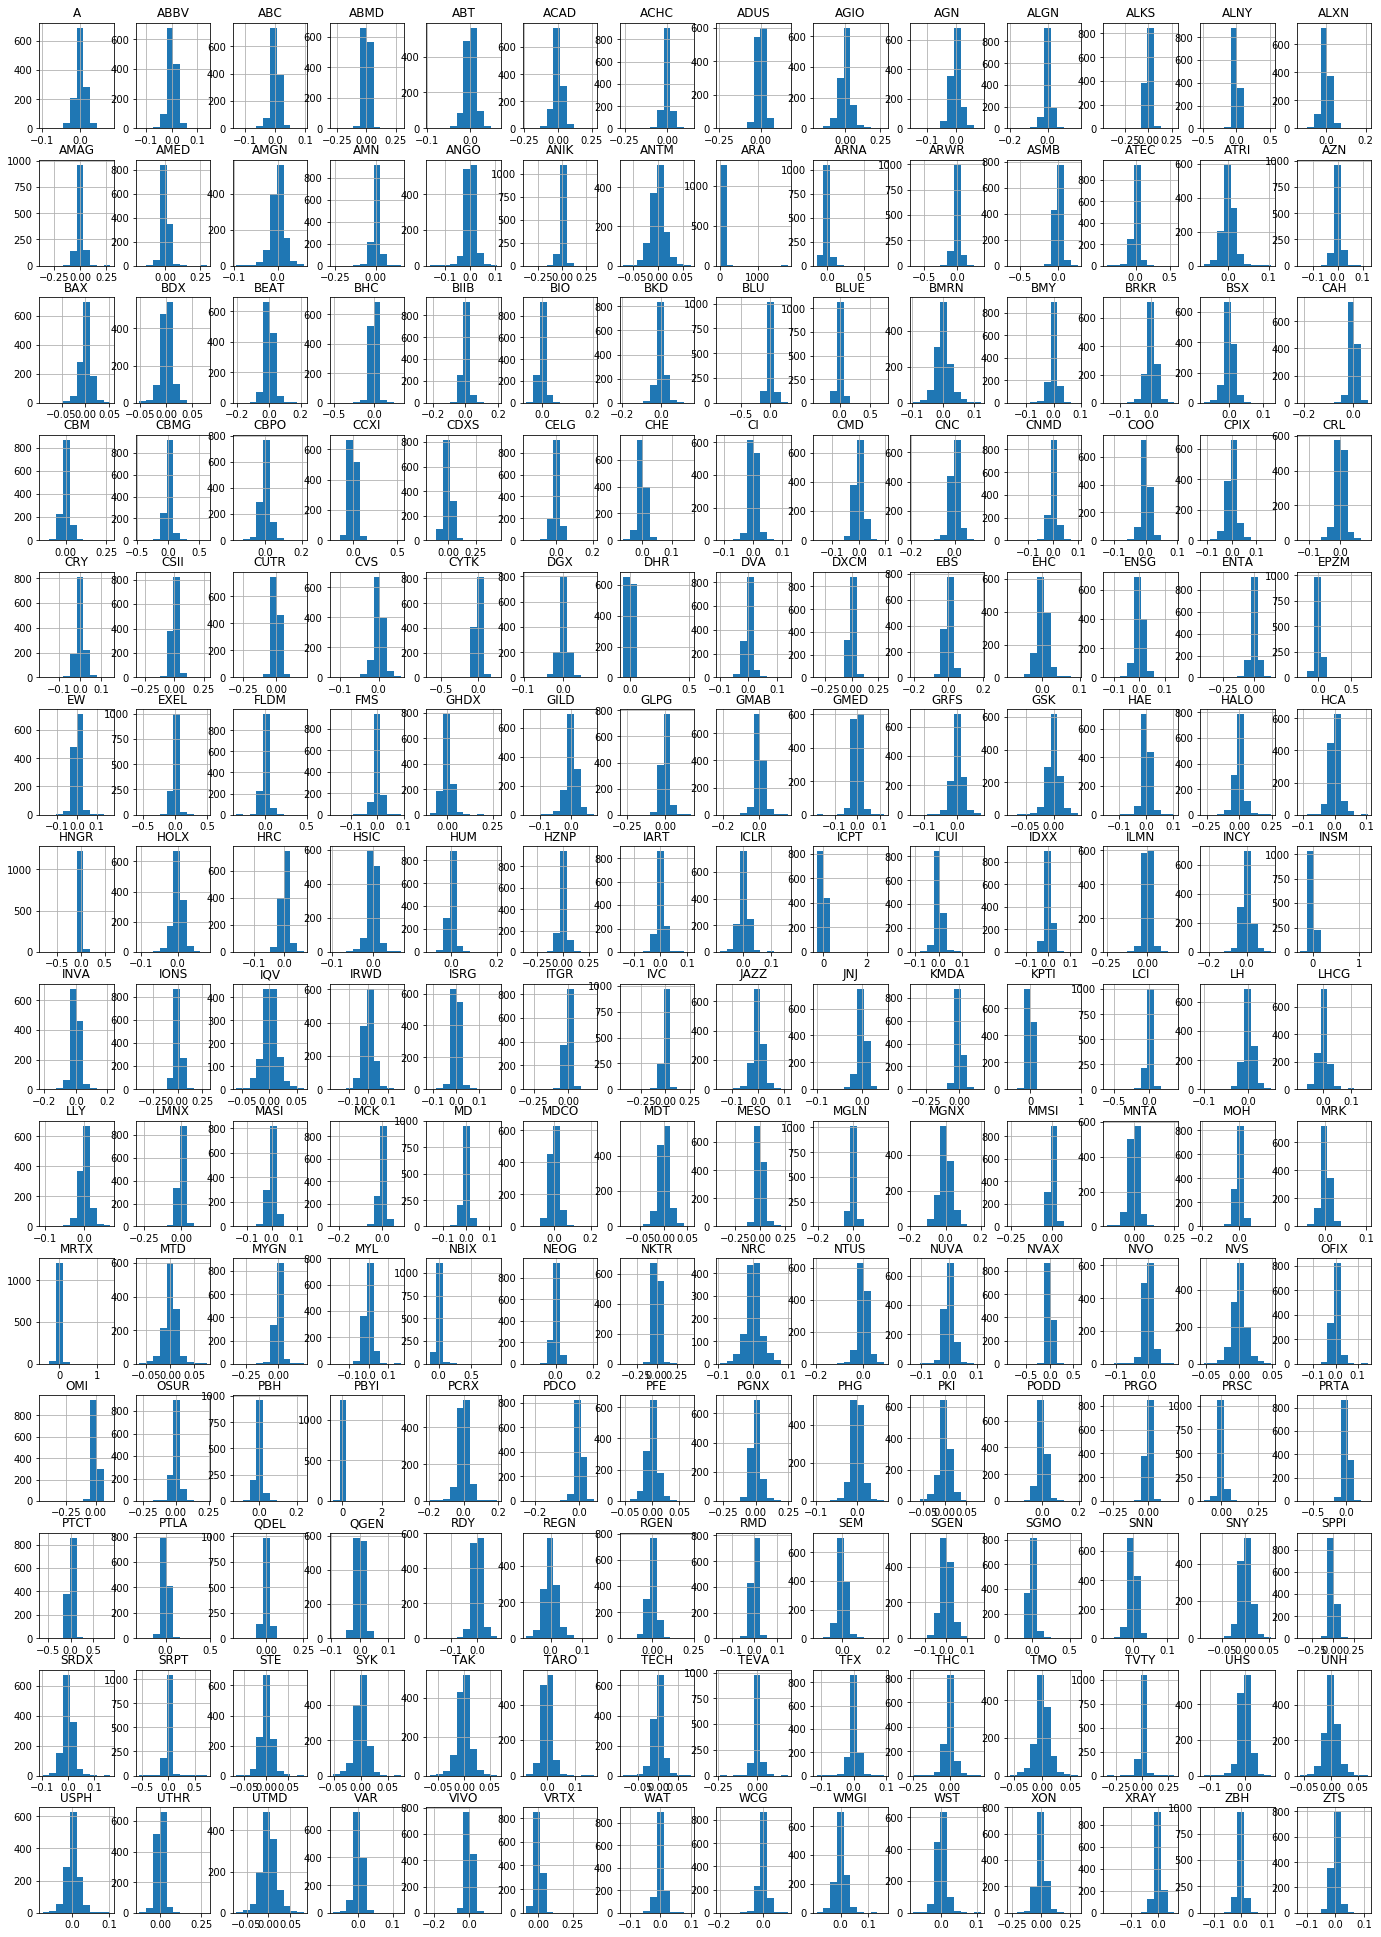

In [0]:
d_rets.hist()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.subplots_adjust(left=0.0, right=1.0, bottom=-1.25, top=1.25)
plt.show()

Skew and Kurtosis Based on Daily Returns

In [0]:
skews = d_rets.skew().sort_values()
#-0.5 < skew < 0.5
# if the skewness coefficient is positive, distribution has bump on left ->bad, a large proportion 
# of the returns will be below the mean
skews = pd.DataFrame(skews, columns=['Skew'])

In [0]:
skew_test = skews[(skews['Skew'] < .5) & (skews['Skew'] > -.5)]
#skew_test.head()
#len(skew_test.index)
skew_test.head()

,Skew
Symbols,
HOLX,-0.486685
NUVA,-0.484676
ALGN,-0.465711
A,-0.460931
BAX,-0.450362


In [0]:
len(skew_test)

80

In [0]:
d_rets.kurtosis().sort_values()

Symbols
NRC       1.637829
ANTM      1.793030
UTMD      1.805607
IQV       1.999768
UNH       2.153255
           ...    
INSM    260.897132
DHR     527.708789
ARA     549.135496
PBYI    691.040017
ICPT    719.626312
Length: 196, dtype: float64

In [0]:
kurts = d_rets.kurtosis().sort_values()

# kurtosis <= 3, kurtosis < 3 denotes that returns are concentrated around the mean
# kurtosis > 3, fat tails ->bad
kurts = pd.DataFrame(kurts, columns=['Kurtosis'])

In [0]:
kurt_test = kurts[kurts['Kurtosis'] <= 3.5]
len(kurt_test.index)

18

In [0]:
optimal_set = list(set(skew_test.index) & set(kurt_test.index))
len(optimal_set)

17

In [0]:
opt = d_rets[optimal_set]
opt.columns

Index(['UNH', 'SYK', 'ANTM', 'TAK', 'UTMD', 'BMRN', 'PFE', 'TMO', 'MGNX',
       'NRC', 'IRWD', 'AMGN', 'IQV', 'SGEN', 'MTD', 'NVS', 'USPH'],
      dtype='object', name='Symbols')

After Passing the Kurtosis and Skew Test as Recommended by Portfolio Anaylsis Methods 15 Tickers Remain

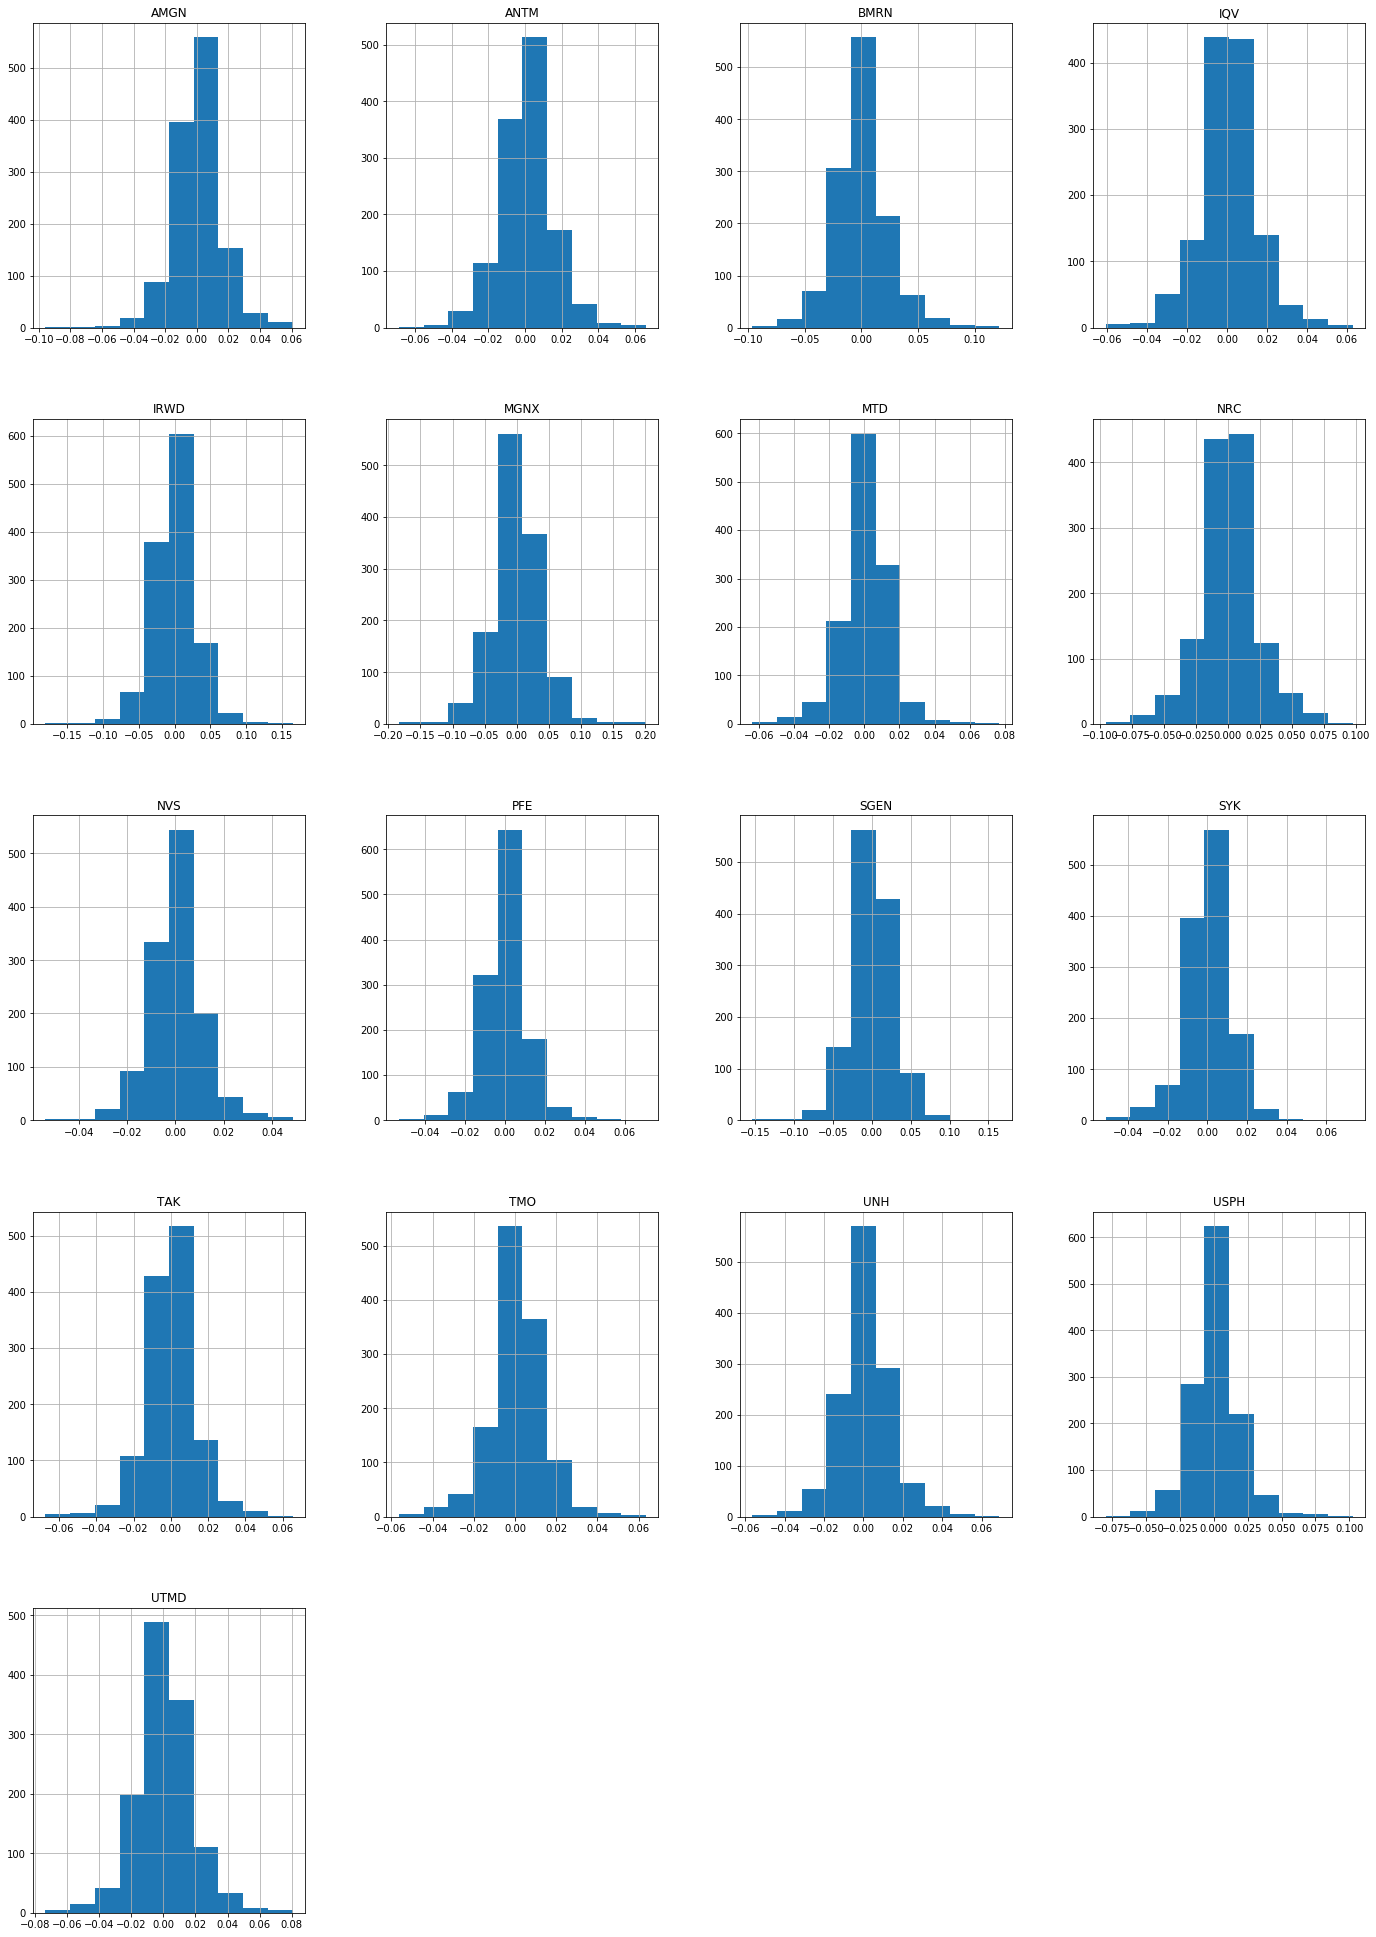

In [0]:
opt.hist()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.subplots_adjust(left=0.0, right=1.0, bottom=-1.25, top=1.25)
plt.show()

In [0]:
from scipy.stats import kurtosis,skew, skewtest,kurtosistest

In [0]:
skew(opt)[:10]
#skewtest

array([-0.05870745, -0.10958259, -0.11028423, -0.10486333, -0.04475974,
       -0.39270359, -0.2114537 ,  0.05443705,  0.10299714, -0.20899761])

In [0]:
kurtosis(opt)[:10]
#kurtosistest

array([2.4199864 , 2.62828974, 2.88301097, 2.58360014, 2.49814329,
       2.51280024, 2.80014617, 1.46926121, 1.99603768, 2.1307301 ])

In [0]:
opt.head()

Symbols,UNH,LCI,CAH,DHR,QGEN,SNY,CELG,CRY,PFE,GSK,JNJ,HSIC,MTD,NVS,USPH
Date,,,,,,,,,,,,,,,
2010-01-05,-0.001586,-0.001597,-0.008915,-0.001198,-0.012357,-0.012739,-0.011661,-0.037594,-0.014263,-0.026530,-0.011595,-0.002807,-0.024991,-0.000951,-0.070175
2010-01-06,0.009848,-0.016000,-0.016439,0.001865,0.010724,-0.000496,0.023598,-0.032813,-0.003216,-0.011714,0.008134,0.003191,-0.007670,-0.003615,0.022013
2010-01-07,0.038376,-0.011382,-0.000315,0.008245,0.004421,-0.005462,-0.008867,0.009693,-0.003763,0.003386,-0.007137,0.003555,-0.017317,-0.008784,0.019076
2010-01-08,-0.009391,0.009868,-0.003155,0.013981,-0.004401,0.003245,0.024691,0.033600,0.008095,-0.009161,0.003438,0.005966,0.016925,0.008091,-0.016304
2010-01-11,0.006728,0.001629,0.013291,0.011316,0.004863,0.016671,0.000000,0.012384,0.008030,0.012895,0.000156,0.032987,0.008909,0.017963,-0.008594


Setup for Sortino Ratio, Target and Risk Free Rate

In [0]:
target = 0
rfr = 0.0174

In [0]:
import numpy as np

In [0]:
opt.columns

Index(['UNH', 'LCI', 'CAH', 'DHR', 'QGEN', 'SNY', 'CELG', 'CRY', 'PFE', 'GSK',
       'JNJ', 'HSIC', 'MTD', 'NVS', 'USPH'],
      dtype='object', name='Symbols')

Negative Returns

In [0]:
neg_rets = opt[opt<0]
# based on daily returns
neg_rets.head()

Symbols,UNH,LCI,CAH,DHR,QGEN,SNY,CELG,CRY,PFE,GSK,JNJ,HSIC,MTD,NVS,USPH
Date,,,,,,,,,,,,,,,
2010-01-05,-0.001586,-0.001597,-0.008915,-0.001198,-0.012357,-0.012739,-0.011661,-0.037594,-0.014263,-0.026530,-0.011595,-0.002807,-0.024991,-0.000951,-0.070175
2010-01-06,NaN,-0.016000,-0.016439,NaN,NaN,-0.000496,NaN,-0.032813,-0.003216,-0.011714,NaN,NaN,-0.007670,-0.003615,NaN
2010-01-07,NaN,-0.011382,-0.000315,NaN,NaN,-0.005462,-0.008867,NaN,-0.003763,NaN,-0.007137,NaN,-0.017317,-0.008784,NaN
2010-01-08,-0.009391,NaN,-0.003155,NaN,-0.004401,NaN,NaN,NaN,NaN,-0.009161,NaN,NaN,NaN,NaN,-0.016304
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008594


Expected Returns

In [0]:
exp_rets = opt.mean()
exp_rets[:10]

Symbols
UNH     0.001049
LCI     0.001776
CAH     0.000839
DHR     0.000701
QGEN    0.000257
SNY     0.000321
CELG    0.001134
CRY     0.000664
PFE     0.000570
GSK     0.000231
dtype: float64

Standard Deviation of Negative Returns

In [0]:
down_std = neg_rets.std()
down_std[:10]

Symbols
UNH     0.010376
LCI     0.022718
CAH     0.009148
DHR     0.009149
QGEN    0.010721
SNY     0.011590
CELG    0.012917
CRY     0.016000
PFE     0.007731
GSK     0.008170
dtype: float64

Using Sortino Ratio to Finalize and Save Best 5 Tickers

In [0]:
sortino_ratio = (exp_rets - rfr)/down_std
sortino_ratio.sort_values(ascending=False)

# toss tickers with nans and let 5 tickers with the smallest sortino ratio be the portfolio
best_ticks = sortino_ratio.sort_values(ascending=False)[:5]
best_ticks.index

Index(['LCI', 'CRY', 'USPH', 'CELG', 'MTD'], dtype='object', name='Symbols')

Max Drawdown on Best Tickers, Graphing Method for Price Minimum Visualization

In [0]:
data = dr.get_data_yahoo(opt.columns, start_date, end_date)

best dataframe contains best tickers

In [0]:
best = data.loc[:,('Adj Close',slice(None))]
best.columns = best.columns.droplevel(0)

In [0]:
best.head()

Symbols,UNH,LCI,CAH,DHR,QGEN,SNY,CELG,CRY,PFE,GSK,JNJ,HSIC,MTD,NVS,USPH
Date,,,,,,,,,,,,,,,
2010-01-04,27.111750,6.26,25.261320,18.598349,22.657120,26.979107,27.870001,6.340965,13.097752,25.616924,48.185139,20.952942,105.639999,32.815689,15.243542
2010-01-05,27.068748,6.25,25.036127,18.576075,22.377153,26.635424,27.545000,6.102583,12.910937,24.937307,47.626415,20.894117,103.000000,32.784496,14.173820
2010-01-06,27.335314,6.15,24.624548,18.610725,22.617125,26.622208,28.195000,5.902341,12.869421,24.645185,48.013805,20.960785,102.209999,32.665985,14.485826
2010-01-07,28.384346,6.08,24.616789,18.764162,22.717112,26.476807,27.945000,5.959553,12.820988,24.728645,47.671124,21.035294,100.440002,32.379055,14.762165
2010-01-08,28.117792,6.14,24.539127,19.026499,22.617125,26.562719,28.635000,6.159795,12.924775,24.502102,47.835011,21.160784,102.139999,32.641029,14.521481


In [0]:
roll_max = best.rolling(min_periods=1, window=250).max()
daily_drawdown = best/roll_max - 1.0
max_d_drawdown = daily_drawdown.rolling(min_periods=1,window=250).min()

In [0]:
daily_drawdown.head()

Symbols,UNH,LCI,CAH,DHR,QGEN,SNY,CELG,CRY,PFE,GSK,JNJ,HSIC,MTD,NVS,USPH
Date,,,,,,,,,,,,,,,
2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,-0.001586,-0.001597,-0.008915,-0.001198,-0.012357,-0.012739,-0.011661,-0.037594,-0.014263,-0.026530,-0.011595,-0.002807,-0.024991,-0.000951,-0.070175
2010-01-06,0.000000,-0.017572,-0.025207,0.000000,-0.001765,-0.013229,0.000000,-0.069173,-0.017433,-0.037933,-0.003556,0.000000,-0.032469,-0.004562,-0.049707
2010-01-07,0.000000,-0.028754,-0.025515,0.000000,0.000000,-0.018618,-0.008867,-0.060150,-0.021131,-0.034675,-0.010668,0.000000,-0.049224,-0.013306,-0.031579
2010-01-08,-0.009391,-0.019169,-0.028589,0.000000,-0.004401,-0.015434,0.000000,-0.028571,-0.013207,-0.043519,-0.007266,0.000000,-0.033131,-0.005322,-0.047368


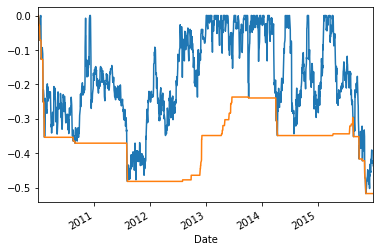

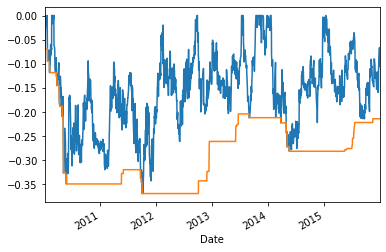

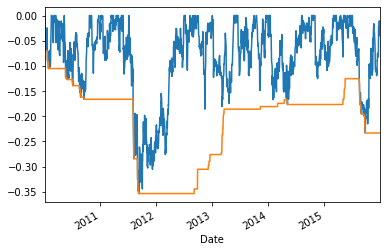

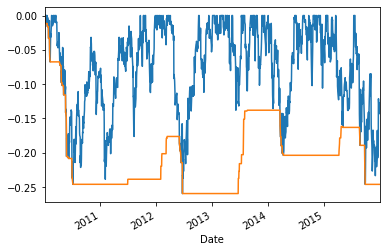

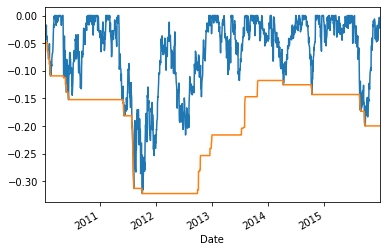

In [0]:
for f in best_ticks.index:
  daily_drawdown[f].plot()
  max_d_drawdown[f].plot()
  plt.show()
 